### info:

In [16]:
# Accuracy: quanto il modello indovina
# Precision, Recall: quando è bravo a evitare errori pericolosi
# F1: se c'è bilanciamento
# MatrixConfusion: quanto sbaglia e su quali classi
# ROC curva, AUC: capacità globale di distinguere 0/1
# Gini Impurity: criterio usato per suddividere i nodi dell'albero
# Forest: tanti alberi --> maggiore robustezza e generalizzazione 
# class_weight='balanced': per classi sbilanciate 
# Feature Importance: classifichiamo le X più importanti
# Pipeline: sistema che collega encoding, split e modello in un unico flusso ordinato
# Interpretazione grafici: ROC curva ideale vicina al punto(0,1), Confusion Matrix deve mostrare molti VERI POITIVI e molti VERI NEGATIVI 

### Librerie:

In [17]:
# Importazione Librerire necessarie:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt 
from matplotlib import cm 
import seaborn as sns


### Caricamento file df_EDA e VISUALIZZAZIONE:

In [18]:
# Definiamo 'df_randFor' da 'df_EDA':
df_randFor = pd.read_csv('data/df_EDA')
df_randFor.head()

,person_age,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,3,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,0,1
1,21,0,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,1,0
2,25,0,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,0,1
3,23,2,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,0,1
4,24,3,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4,586,0,1


### Separiamo X e Y:

In [19]:
# Separazione X e Y:
Y = df_randFor['loan_status']
X = df_randFor.drop('loan_status', axis=1)


### Suddivisione in Train/Test:

In [20]:
# Training Set: 70%, per addestramento
# Test Set: 30%, per il test
# Parametro stratify=y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

### Pipeline: OrdinalEncoding

##### OrdinalEncoding:

In [21]:
# Salviamo colonne categoriche in variabile 'cat_col':
cat_col = ['person_home_ownership','loan_intent','person_education']

In [22]:
# OrdinalEncoding set: (dove applicarlo)
ordinal_Enc = ColumnTransformer(transformers=[('cat', OrdinalEncoder(), cat_col)], remainder='passthrough') 
# passthrough: salta le colonne numeriche
df_randForEncoded = ordinal_Enc.fit_transform(df_randFor) # Ancora Array Numpy --> Da trasformare in DataFrame
# Trasformazione in df:
df_randForEncoded = pd.DataFrame(df_randForEncoded, columns=ordinal_Enc.get_feature_names_out())

df_randForEncoded



,cat__person_home_ownership,cat__loan_intent,cat__person_education,remainder__person_age,remainder__person_income,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__credit_score,remainder__previous_loan_defaults_on_file,remainder__loan_status
0,2.0,4.0,3.0,22.0,71948.0,35000.0,16.02,0.49,3.0,561.0,0.0,1.0
1,1.0,1.0,0.0,21.0,12282.0,1000.0,11.14,0.08,2.0,504.0,1.0,0.0
2,0.0,3.0,0.0,25.0,12438.0,5500.0,12.87,0.44,3.0,635.0,0.0,1.0
3,2.0,3.0,2.0,23.0,79753.0,35000.0,15.23,0.44,2.0,675.0,0.0,1.0
4,2.0,3.0,3.0,24.0,66135.0,35000.0,14.27,0.53,4.0,586.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38539,2.0,3.0,1.0,27.0,47971.0,15000.0,15.66,0.31,3.0,645.0,0.0,1.0
38540,2.0,2.0,1.0,37.0,65800.0,9000.0,14.07,0.14,11.0,621.0,0.0,1.0
38541,2.0,0.0,1.0,33.0,56942.0,2771.0,10.02,0.05,10.0,668.0,0.0,1.0
38542,2.0,1.0,2.0,29.0,33164.0,12000.0,13.23,0.36,6.0,604.0,0.0,1.0


##### Modello RandomForest (con bilanciamento classi 0/1):


In [23]:
randFor_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100) 
# class_weight = 'balanced', Bilancia le classi
# n_estimators = 100, N° Alberi nella Foresta


##### Pipeline costruzione:

In [24]:
randFor_pipeline = Pipeline(steps=[('preprocessor', ordinal_Enc), ('classifier', randFor_model)])

### Addestramento modello RandomForest: 

In [25]:
# Addestramento con fit():
randFor_pipeline.fit(X_train, Y_train)

c:\Users\Francesca\Desktop\TEAM_PROJECT\project\CUSTOMER_SCORING1.0\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_intent',
                                                   'person_education'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

### Visualizzazione Random Forest: Trasparenza nei calcoli

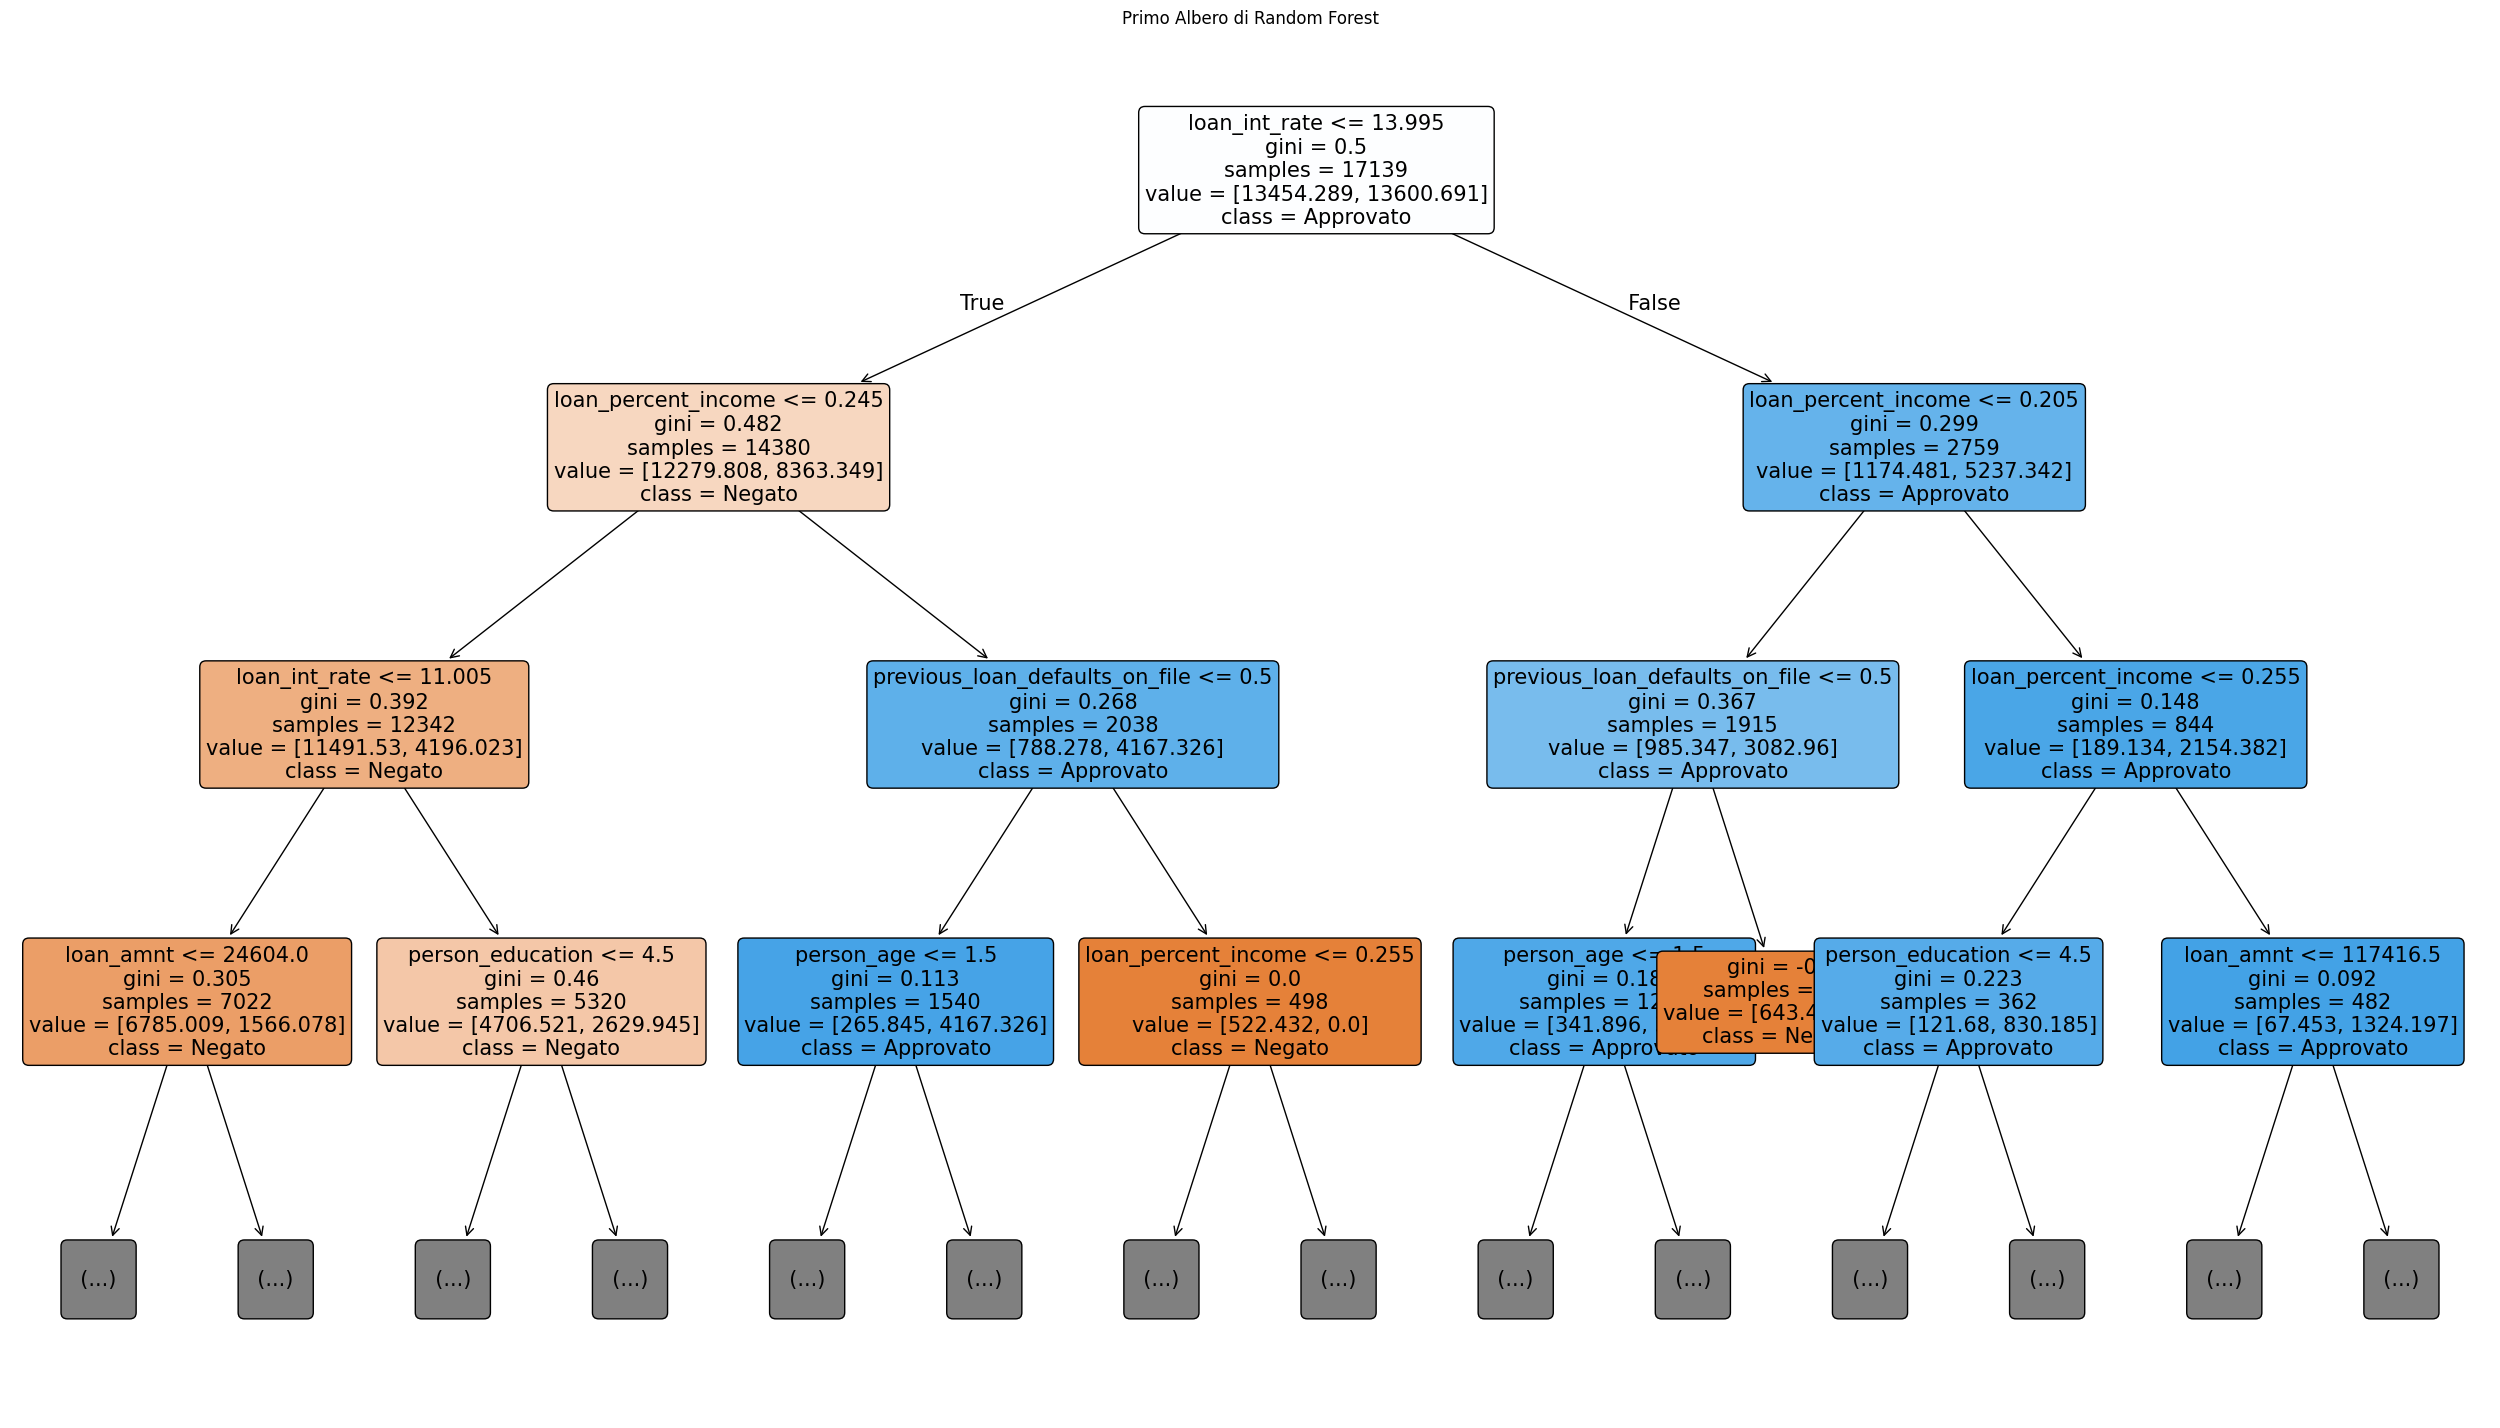

In [26]:
# Scegliamo il 1° Albero di Random Forest:
first_tree = randFor_pipeline.named_steps['classifier'].estimators_[0]

# Impostiamo grafico:
plt.figure(figsize=(32,18))
plot_tree(first_tree, feature_names=X.columns, class_names=['Negato', 'Approvato'], filled=True, rounded=True, max_depth=3, fontsize=15, impurity=True, proportion=False)
# filled: Colora le foglie
# rounded: angoli arrotondati
# max_depth: n° livelli da visualizzare
# fontsize: Grandezza scritte(font)
plt.title('Primo Albero di Random Forest')
plt.show()

In [27]:
# Colori: 
# Arancione: classe Negato(0)
# Azzurro: classe Concesso(1)
# I rami ci mostrano come i dati vengono suddivisi fino ad arrivare a una decisione: 
# prestito (Concesso/Negato)(1/0)(/Azzuro/Arancione)

In [28]:
# Già da questo primo albero possiamo notare che la variabile loan_int_rate (il tasso d’interesse del prestito)
# è utilizzata fin dalla radice, quindi è molto influente
# Inoltre, anche loan_percent_income e previous_loan_defaults_on_file compaiono in nodi decisivi
# Implica che l’approvazione del prestito dipende fortemente da quanto pesa rispetto al reddito
# e da eventuali precedenti negativi nel credito

##### Predizione:

In [29]:
Y_pred = (randFor_pipeline.predict_proba(X_test)[:,1] >= 0.4).astype(int) 
# predic_proba(X_test)[:,1]>=0.4 di tipo int : Per aumentare Recall, Ridurre i FALSI NEGATIVI

### Valutazione Modello: 



##### Calcolo metriche (Accuracy, Precision, Recall, F1)

In [30]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Recall is {recall}')
print(f'F1 is {f1}')

report = classification_report(Y_test, Y_pred, target_names=["Negato (0)", "Concesso (1)"])
print(report)


Accuracy is 0.9230370114147354
Precision is 0.8426846590909091
Recall is 0.8414893617021276
F1 is 0.8420865862313698
              precision    recall  f1-score   support

  Negato (0)       0.95      0.95      0.95      8744
Concesso (1)       0.84      0.84      0.84      2820

    accuracy                           0.92     11564
   macro avg       0.90      0.90      0.90     11564
weighted avg       0.92      0.92      0.92     11564



##### ConfusionMatrix e Heatmap:

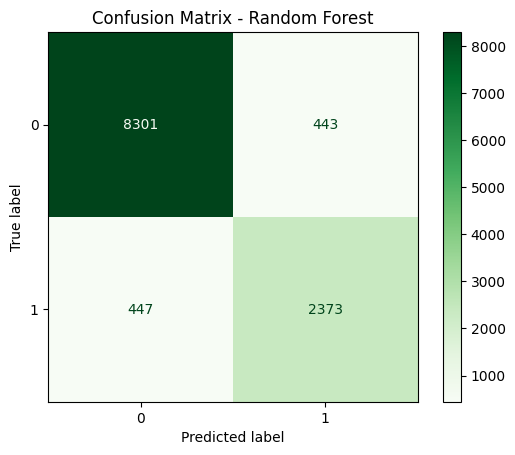

In [31]:
# Matrice di confusione:
conf_matrx = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx)
disp.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [32]:
# La DIAGONALE (8301 + 2373) è DOMINANTE! (Ottimo)
# Gli ERRORI sono BILANCIATI: 443(FP) e 447(FN) sono simili
# Implica che --> Il modello è EQUILIBRATO: Non favorisce nè Approvazione(1), nè Rifiuto(0) del prestito.
# FP < FN: Nei Prestiti è SEMPRE PEGGIO un FalsePositive 
# Meglio RIFIUTARE un cliente buono (FN) piuttosto che APPROVARE un cliente cattivo (FP)

##### ROC curve + AUC(Area sotto la curva):

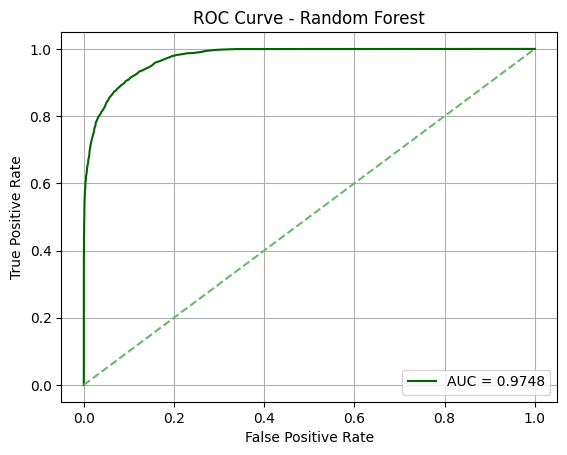

In [33]:
# Calcolo probabilità per classe positiva:
Y_prob = randFor_pipeline.predict_proba(X_test)[:,1]

# Calcolo ROC:
fpr, tpr, thresholds = roc_curve(Y_test,Y_prob)
auc = roc_auc_score(Y_test, Y_prob)

# Grafico:
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color= '#66bb6a') # Linea Random '--'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()         


In [34]:
# AUC: 0.9748
# ROC curva: Molto distante dalla linea random


##### Importanza Feature in Random Forest:
##### VISUALIZZAZIONE prime 10 Variabili con Importance più ALTA: 


In [35]:
# Quali variabili X sono più utili al modello
# Per distinguere tra Prestiti Concessi (1) e Prestiti Negati(0):
feature_columns = X.columns
importances = randFor_pipeline.named_steps['classifier'].feature_importances_

# Creazione DataFrame ordinato:
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualizziamo le top 10:
print(feature_importances.head(10))


                           Feature  Importance
10  previous_loan_defaults_on_file    0.377757
6                    loan_int_rate    0.138821
7              loan_percent_income    0.124078
4                        loan_amnt    0.106850
5                      loan_intent    0.053708
9                     credit_score    0.051671
0                       person_age    0.044879
1                 person_education    0.031833
3            person_home_ownership    0.030204
8       cb_person_cred_hist_length    0.024335


In [36]:
# Per confermare questi segnali, abbiamo analizzato la feature importance della Random Forest: 
# Abbiamo misurato quali variabili vengono usate più spesso e in modo più decisivo
# su tutti gli alberi del modello, non solo sul primo

##### Visualizzazione Importanza delle feature con BarPlot:

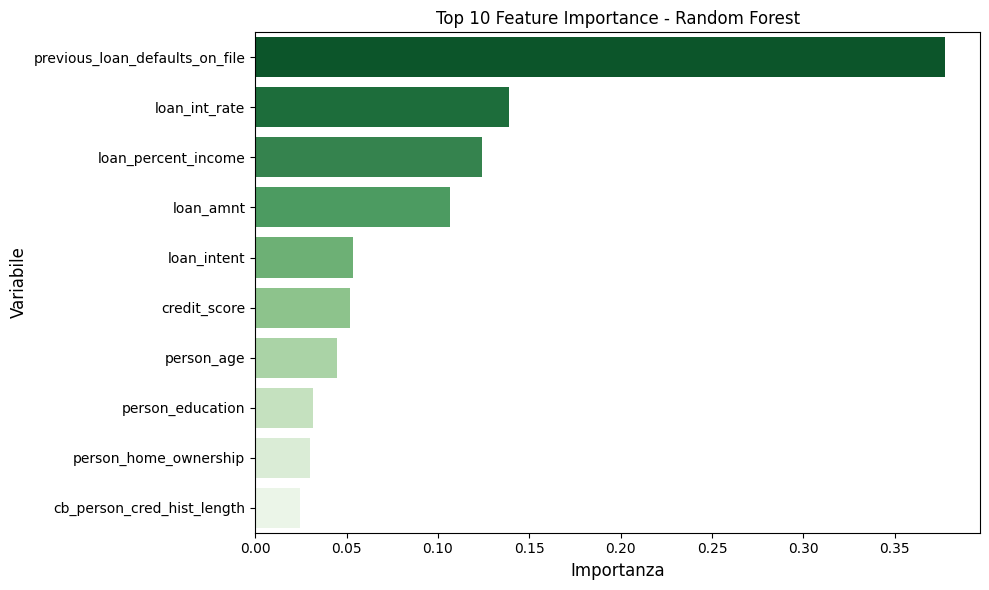

In [37]:
# Impostiamo colore palette:
color_pltt = sns.color_palette('Greens', n_colors=10)[::-1] # Più è verde più è 'Importante'
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), hue='Feature', dodge=False, palette=color_pltt)
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Importanza', fontsize=12)
plt.ylabel('Variabile', fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
# Come previsto, le variabili con maggiore importanza sono: 
# previous_loan_defaults_on_file, loan_int_rate, loan_percent_income,
# Questo conferma che sono questi i fattori chiave che influenzano l’approvazione del prestito nel nostro modello

In [39]:
df_randForEncoded

,cat__person_home_ownership,cat__loan_intent,cat__person_education,remainder__person_age,remainder__person_income,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__credit_score,remainder__previous_loan_defaults_on_file,remainder__loan_status
0,2.0,4.0,3.0,22.0,71948.0,35000.0,16.02,0.49,3.0,561.0,0.0,1.0
1,1.0,1.0,0.0,21.0,12282.0,1000.0,11.14,0.08,2.0,504.0,1.0,0.0
2,0.0,3.0,0.0,25.0,12438.0,5500.0,12.87,0.44,3.0,635.0,0.0,1.0
3,2.0,3.0,2.0,23.0,79753.0,35000.0,15.23,0.44,2.0,675.0,0.0,1.0
4,2.0,3.0,3.0,24.0,66135.0,35000.0,14.27,0.53,4.0,586.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38539,2.0,3.0,1.0,27.0,47971.0,15000.0,15.66,0.31,3.0,645.0,0.0,1.0
38540,2.0,2.0,1.0,37.0,65800.0,9000.0,14.07,0.14,11.0,621.0,0.0,1.0
38541,2.0,0.0,1.0,33.0,56942.0,2771.0,10.02,0.05,10.0,668.0,0.0,1.0
38542,2.0,1.0,2.0,29.0,33164.0,12000.0,13.23,0.36,6.0,604.0,0.0,1.0
